In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('walmart_stock.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.set_index('Date', inplace = True)

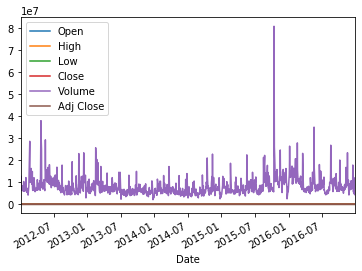

In [6]:
df.plot()

In [7]:
ts = df['Open']

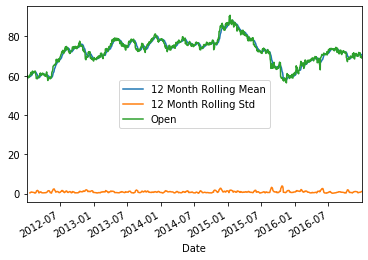

In [8]:
ts.rolling(12).mean().plot(label='12 Month Rolling Mean')
ts.rolling(12).std().plot(label='12 Month Rolling Std')
ts.plot()
plt.legend()

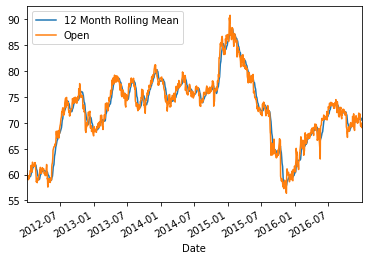

In [9]:
ts.rolling(12).mean().plot(label='12 Month Rolling Mean')
ts.plot()
plt.legend()

c:\users\haridittu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


<Figure size 432x288 with 0 Axes>

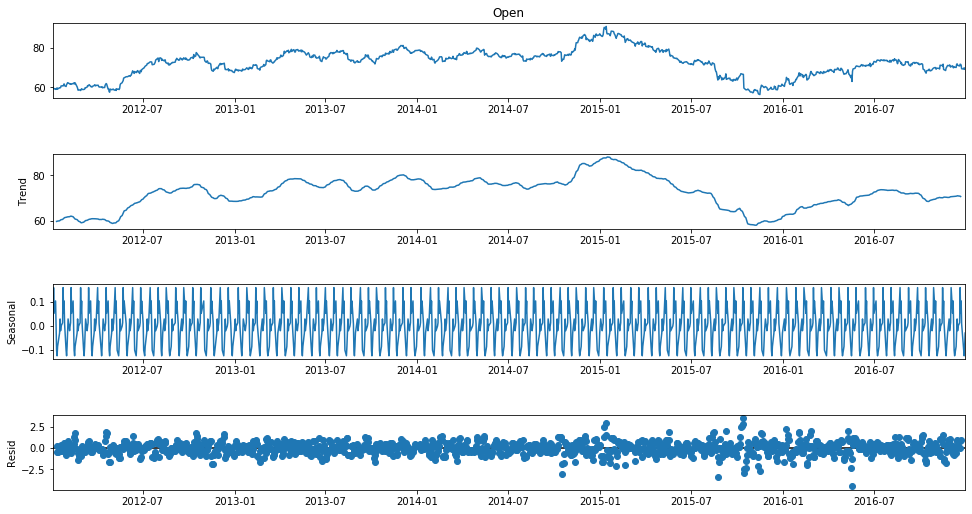

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Open'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [11]:

def adf_check(time_series):

    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
adf_check(df['Open'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.31517314914831
p-value : 0.1671210162134693
#Lags Used : 11
Number of Observations Used : 1246
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [14]:
df['Open First Difference'] = df['Open'] - df['Open'].shift(1)

In [15]:
df['Open First Difference'].head()

Date
2012-01-03         NaN
2012-01-04    0.239998
2012-01-05   -0.860001
2012-01-06    0.070000
2012-01-09   -0.389999
Name: Open First Difference, dtype: float64

In [16]:
adf_check(df['Open First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -10.395143169790531
p-value : 1.9741449125946263e-18
#Lags Used : 10
Number of Observations Used : 1246
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


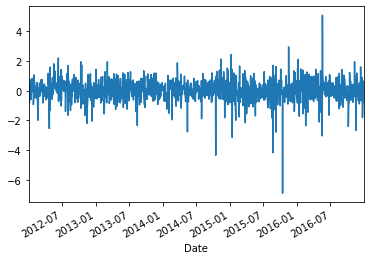

In [17]:
df['Open First Difference'].plot()

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

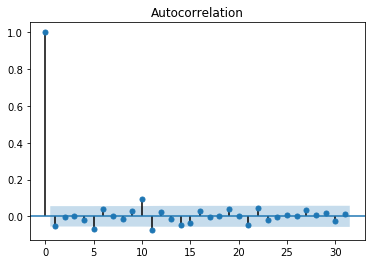

In [19]:
fig_first = plot_acf(df["Open First Difference"].dropna())

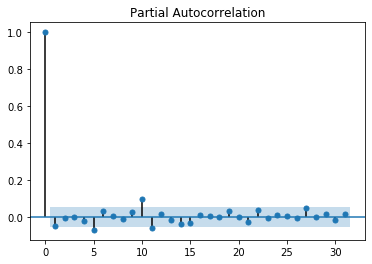

In [20]:
result = plot_pacf(df["Open First Difference"].dropna())

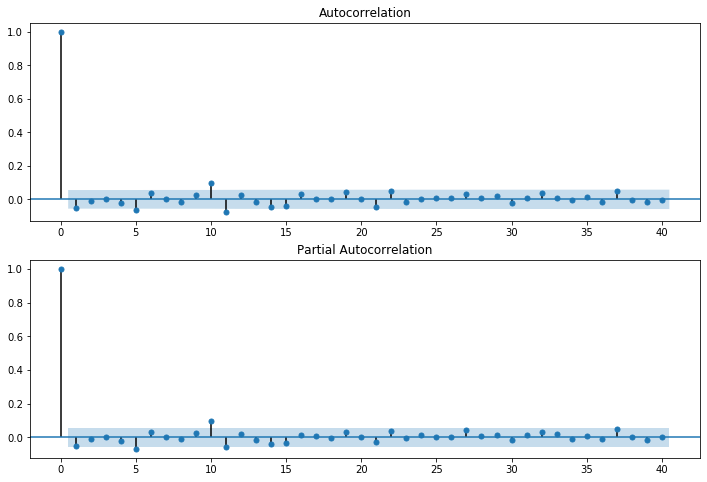

In [21]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Open First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Open First Difference'].iloc[13:], lags=40, ax=ax2)

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [23]:
model = sm.tsa.statespace.SARIMAX(df['Open'],order=(0,1,0), seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())

c:\users\haridittu\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\haridittu\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                               Open   No. Observations:                 1258
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -1827.327
Date:                            Sat, 15 May 2021   AIC                           3656.654
Time:                                    21:19:53   BIC                           3661.781
Sample:                                         0   HQIC                          3658.581
                                           - 1258                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.1025      0.025     44.135      0.000       1.054       1.151
Ljung-Box (L1) (Q):                

In [24]:
df.tail()

,Open,High,Low,Close,Volume,Adj Close,Open First Difference
Date,,,,,,,
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411,-1.809998
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240,-0.129997
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087,0.639999
2016-12-29,69.209999,69.519997,69.120003,69.260002,4298400,68.754456,-0.730003
2016-12-30,69.120003,69.430000,68.830002,69.120003,6889500,68.615479,-0.089996


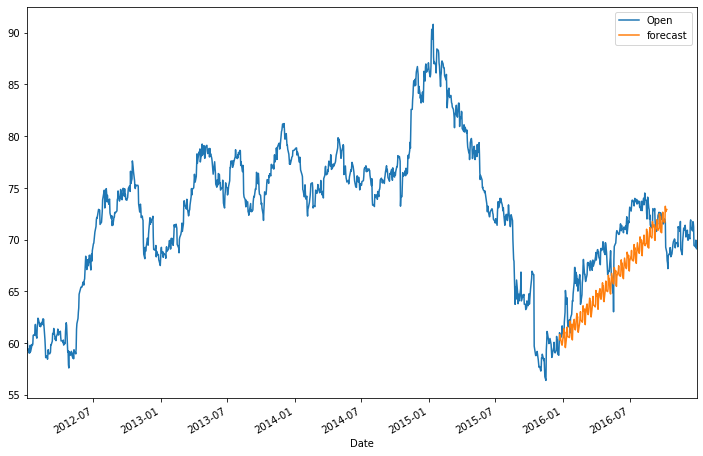

In [25]:
df['forecast'] = results.predict(start = 1000, end= 1200, dynamic= True)  
df[['Open','forecast']].plot(figsize=(12,8))